# KMN K najbliższych sąsiadów

In [59]:
import random
import pandas as pd
import numpy as np
from scipy.spatial import KDTree
from sklearn.metrics import mean_absolute_error
import random
import matplotlib.pyplot as plt

In [60]:
!wget https://raw.githubusercontent.com/betacord/ML/master/lab1/data/data.csv

--2023-03-18 10:17:34--  https://raw.githubusercontent.com/betacord/ML/master/lab1/data/data.csv
Translacja raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Łączenie się z raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 7381541 (7,0M) [text/plain]
Zapis do: ‘data.csv.1’

data.csv.1          100%[===================>]   7,04M  10,1MB/s    w 0,7s     

2023-03-18 10:17:35 (10,1 MB/s) - zapisano ‘data.csv.1’ [7381541/7381541]



In [61]:
houses = pd.read_csv('data.csv')
houses.head(3)

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784


In [62]:
houses

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,523000.0,1872,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,288000.0,3480,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52415,523000.0,6982,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769810,-122.367447
52416,425000.0,5481,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.510895,-122.366936
52417,377000.0,6793,2,2,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.766289,-122.358192
52418,581000.0,7200,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769989,-122.364822


In [63]:
houses.columns

Index(['AppraisedValue', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'MtRainier', 'Olympics',
       'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView',
       'WfntLocation', 'WfntFootage', 'WfntBank', 'WfntPoorQuality',
       'WfntRestrictedAccess', 'WfntAccessRights', 'WfntProximityInfluence',
       'TidelandShoreland', 'LotDepthFactor', 'TrafficNoise', 'PowerLines',
       'OtherNuisances', 'NbrBldgSites', 'Contamination',
       'AdjacentGolfFairway', 'AdjacentGreenbelt', 'HistoricSite',
       'CurrentUseDesignation', 'NativeGrowthProtEsmt', 'Easements',
       'OtherDesignation', 'DeedRestrictions', 'DevelopmentRightsPurch',
       'WaterProblems', 'TranspConcurrency', 'OtherProblems', 'lat', 'long'],
      dtype='object')

In [64]:
houses.columns.values

array(['AppraisedValue', 'SqFtLot', 'WaterSystem', 'SewerSystem',
       'Access', 'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'MtRainier', 'Olympics',
       'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek',
       'OtherView', 'WfntLocation', 'WfntFootage', 'WfntBank',
       'WfntPoorQuality', 'WfntRestrictedAccess', 'WfntAccessRights',
       'WfntProximityInfluence', 'TidelandShoreland', 'LotDepthFactor',
       'TrafficNoise', 'PowerLines', 'OtherNuisances', 'NbrBldgSites',
       'Contamination', 'AdjacentGolfFairway', 'AdjacentGreenbelt',
       'HistoricSite', 'CurrentUseDesignation', 'NativeGrowthProtEsmt',
       'Easements', 'OtherDesignation', 'DeedRestrictions',
       'DevelopmentRightsPurch', 'WaterProblems', 'TranspConcurrency',
       'OtherProblems', 'lat', 'long'], dtype=object)

### Wybór atrybutów
Wyscie : AppraisedValue
Wesscie
SqFtLot
lat
long


In [65]:
values = houses['AppraisedValue']

In [66]:
houses.drop('AppraisedValue',1, inplace=True)

/tmp/ipykernel_9018/1526003396.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  houses.drop('AppraisedValue',1, inplace=True)


 Normalizacja

In [67]:
houses = (houses - houses.mean())/(houses.max()-houses.min())

In [68]:
houses = houses[['SqFtLot','lat','long']]

In [69]:
houses

,SqFtLot,lat,long
0,0.926695,-0.002260,-0.002427
1,0.012250,0.004289,-0.001374
2,-0.002550,0.006580,-0.003288
3,-0.002521,0.002422,-0.003454
4,-0.002293,0.001717,-0.002164
...,...,...,...
52415,-0.001795,0.008325,-0.003298
52416,-0.002008,0.001734,-0.003295
52417,-0.001822,0.008236,-0.003241
52418,-0.001764,0.008330,-0.003282


### Podział danych
trening 80% test 20%

In [70]:
test_rows = random.sample(houses.index.tolist(), int(round(len(houses)*.2)))
train_rows=set(range(len(houses))) - set(test_rows)

In [71]:
df_test = houses.loc[test_rows]
df_train = houses.loc[train_rows]

test_values = values.loc[test_rows]
train_values = values.loc[train_rows]

### KNN implementacja manualna

In [72]:
kdtree = KDTree(houses)

Funkcja przydzielająca predykcję

In [73]:
def predict(query_point, k):
    ''' k liczba sąsiadów'''
    _, idx = kdtree.query(query_point, k)
    return np.mean(values.iloc[idx])

In [74]:
train_predicted_values = []
train_actual_values = []

In [75]:
for _id, row in df_train.iterrows():
  prediction = predict(row, 5)
  train_predicted_values.append(prediction)
  train_actual_values.append(train_values[_id])

### Wyznaczanie błędu regresji

Za pomocą MAE

In [76]:
mae = mean_absolute_error(train_actual_values, train_predicted_values)

In [77]:
f'Sredni blad bezwzgledny dla danych testowych wynosi: {mae}'

'Sredni blad bezwzgledny dla danych testowych wynosi: 59232.70184566959'

### Zad1. 
    Wykorzystać powyższy przykład w celu znalezienia takiej wartości K, dla której wartość średniego błędu bezwzględnego na systemie treningowym

będzie najmniejsza. W tym celu należy stworzyć wykres liniowy, na którym oś x będzie przedstawiała wartość K, a oś y będzie przedstawiała wartość funkcji błędu. Następnie dla "najlepszej" wartości K sprawdzić wartość funkcji błędu na systemie testowym.

### Ilosc sąsiadow i błąd

In [78]:
number_neigbours = []
absolute_error = []
for i in range(3,20):
    number_neigbours.append(i)
    for _id, row in df_train.iterrows():
        prediction = predict(row, i)
        train_predicted_values.append(prediction)
        train_actual_values.append(train_values[_id])
    mae = mean_absolute_error(train_actual_values, train_predicted_values)
    absolute_error.append(mae)

    

In [79]:
print(len(number_neigbours),  absolute_error)

17 [55667.827402867864, 55953.324561501126, 56773.168882543236, 57677.53054193692, 58560.30717909906, 59370.71039475524, 60121.28919537799, 60805.04542657322, 61434.83340411985, 62012.01180645044, 62543.19034415213, 63031.434195089154, 63484.97353314181, 63909.25842913677, 64310.35294639199, 64688.60721855102, 65047.06093059664]


## Wykres

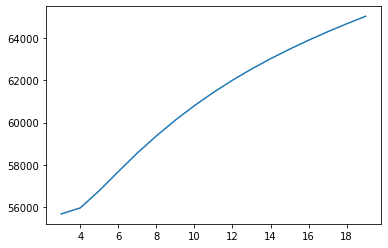

In [80]:
fig, ax = plt.subplots()
ax.plot(number_neigbours, absolute_error)

plt.show()

najmniejszy  blad

In [81]:
min_error = np.min(absolute_error)

In [82]:
min_error

55667.827402867864

#### Ilość sąsiadów

In [83]:
num_neighbour = [i for i, j in enumerate(absolute_error) if j == min_error]
number_neigbours[num_neighbour[0]]

3

### Zad2. Znaleźć "najlepszą" wartość K dla następujących podziałów na system treningowy i testowy:

    60% system treningowy i 40% system testowy
    65% system treningowy i 35% system testowy
    70% system treningowy i 30% system testowy
    75% system treningowy i 25% system testowy


Funkcja Podzial danych 

In [98]:
def split_data(percent_test):
    test_rows = random.sample(houses.index.tolist(), int(round(len(houses)* percent_test)))
    train_rows=set(range(len(houses))) - set(test_rows)
    return test_rows, train_rows

In [99]:
df_test = houses.loc[split_data(.40)[0]]
df_train = houses.loc[split_data(.40)[1]]
test_values = values.loc[split_data(.40)[0]]
train_values = values.loc[split_data(.40)[1]]


In [100]:
number_neigbours = []
absolute_error = []
for i in range(3,20):
    number_neigbours.append(i)
    for _id, row in df_train.iterrows():
        prediction = predict(row, i)
        train_predicted_values.append(prediction)
        train_actual_values.append(train_values[_id])
    mae = mean_absolute_error(train_actual_values, train_predicted_values)
    absolute_error.append(mae)

KeyError: 0